Cost at theta = [1 ; 1]:(this value should be about 303.993192)=  [303.99319222]


Gradient at theta = [1 ; 1]:(this value should be about [-15.303016; 598.250744]
 [ -15.303015674201186 ; 598.2507441727037 ]


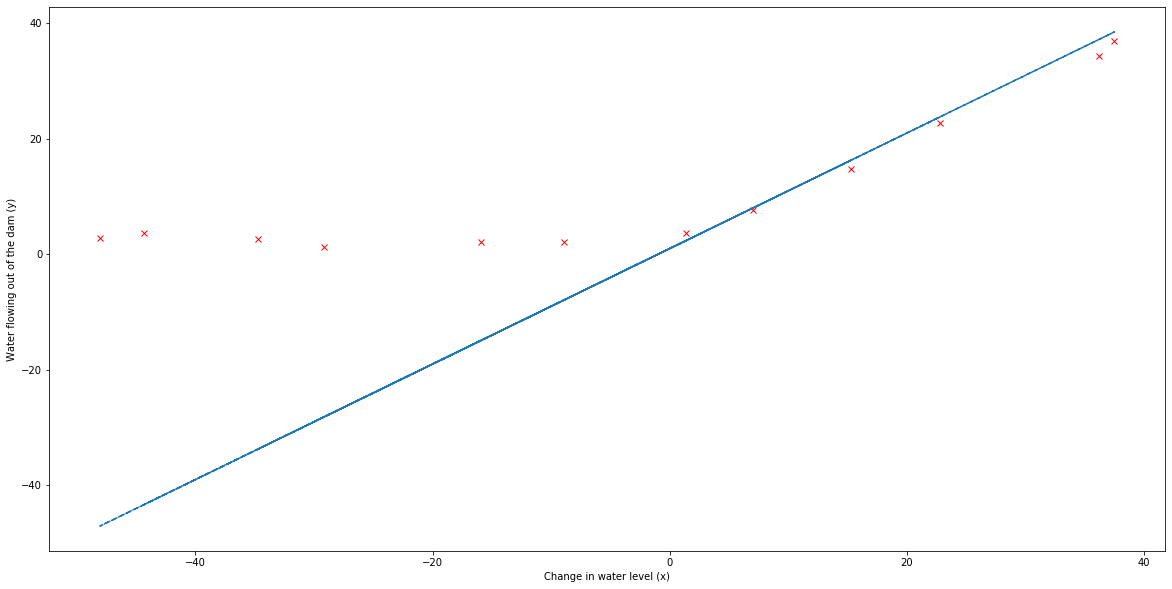

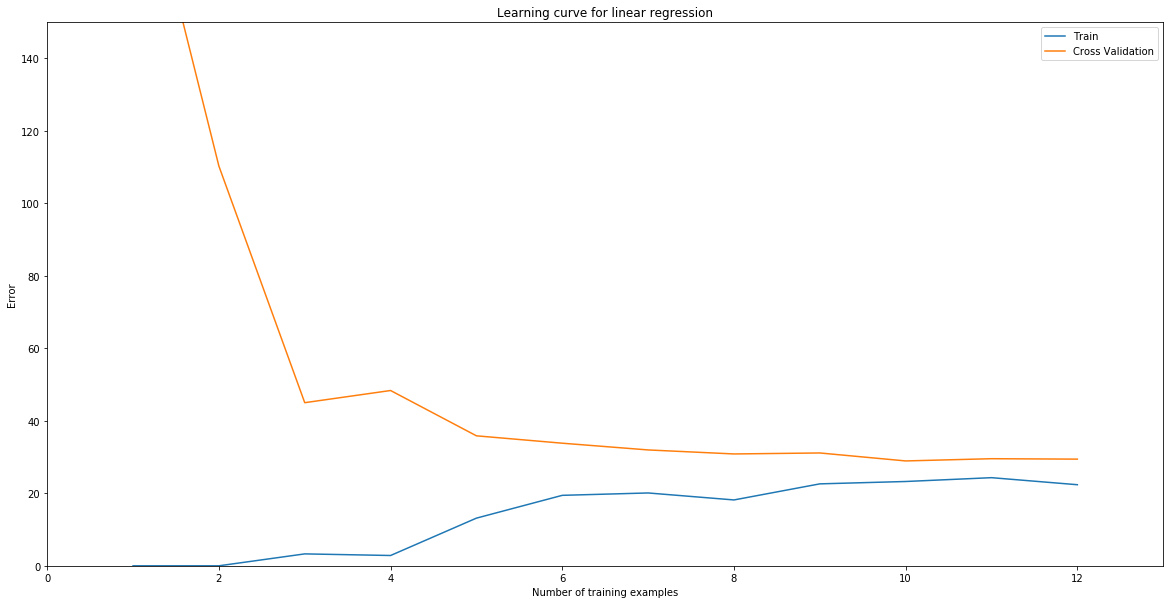

C:\Users\tanuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


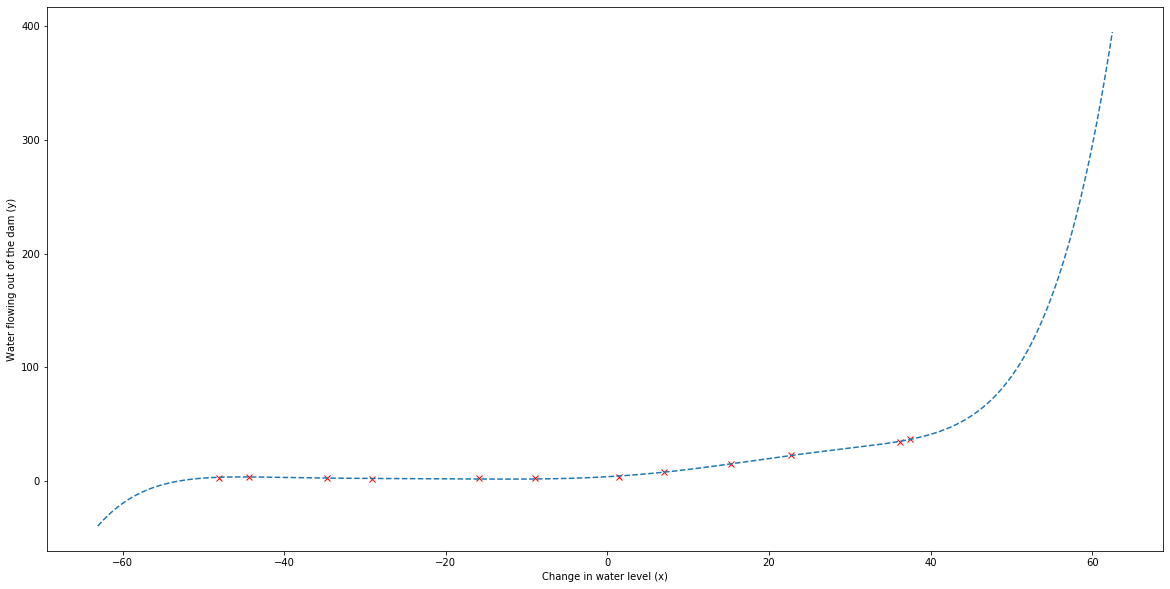

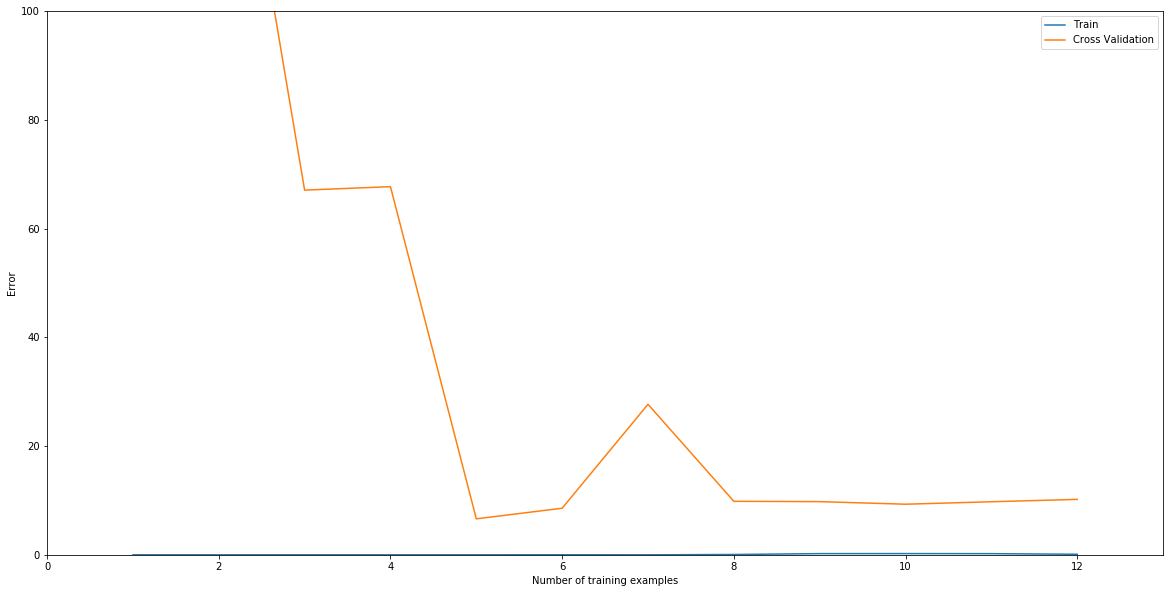

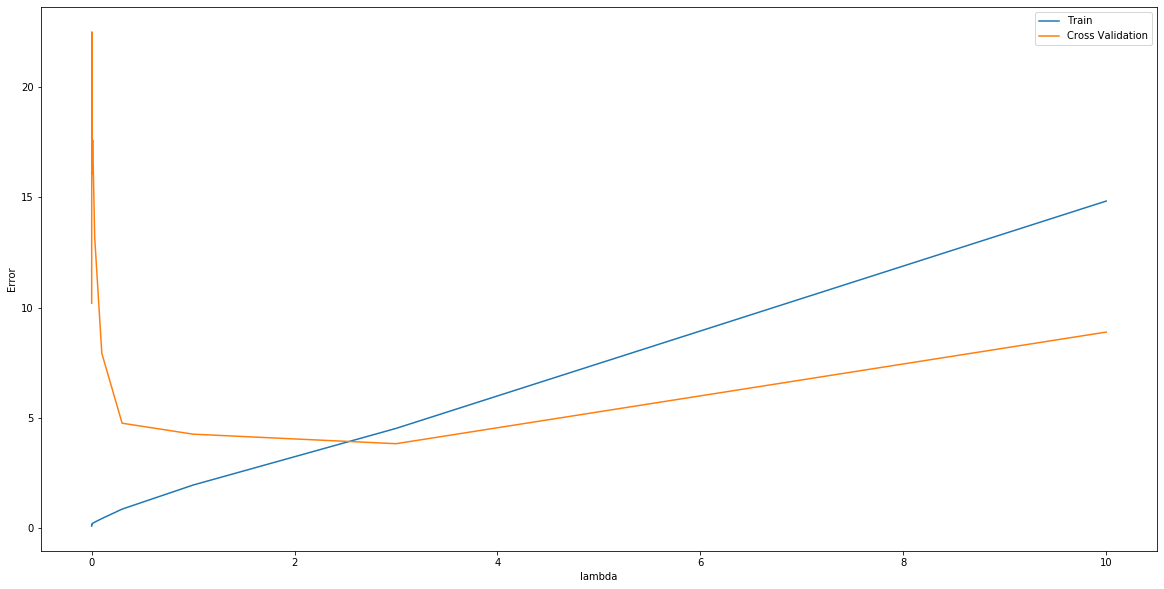

In [1]:
%matplotlib inline
import scipy.io as io
import random
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def learningCurve(X, y, Xval, yval, lambda1):
    Xval = np.concatenate((np.ones((Xval.shape[0],1)),Xval),axis=1)
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    for i in range(1,m+1):
        theta=trainLinearReg(X[0:i,:], y[0:i,:], lambda1)
        error_train[i-1]=linearRegCostFunction(theta, X[0:i,:], y[0:i,:], 0)
        error_val[i-1]=linearRegCostFunction(theta, Xval, yval, 0)
    return error_train, error_val

def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(0,X.shape[0]):
        for j in range(0,p):
            X_poly[i, j]=X[i]**(j+1)
    return X_poly
    
def trainLinearReg(X, y, lambda1):
    n=X.shape[1]
    initial_theta = np.zeros((n, 1)).reshape(-1,1)
    res=op.minimize(fun=linearRegCostFunction, x0=initial_theta, args=(X,y,lambda1), jac=gradient, method='CG', options={'maxiter':70})
    theta=res['x'].reshape(-1,1)
    return theta

def linearRegCostFunction(theta, X, y, lambda1):
    m= X.shape[0]
    n=X.shape[1]
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    J = np.sum((np.dot(X,theta)-y)**2)/(2*m)+(lambda1*(np.sum(theta**2)-theta[0]**2)/(2*m))
    return J

def gradient(theta, X, y, lambda1):
    m= X.shape[0]
    n=X.shape[1]
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    temp= np.dot(X.T,(np.dot(X,theta)-y))/m
    grad= np.dot(X.T,(np.dot(X,theta)-y))/m + (lambda1*theta/m)
    grad[0]=temp[0]
    grad=grad.flatten()
    return grad

mat = io.loadmat('ex5data1.mat')
X=mat['X']
y=mat['y']
Xtest=mat['Xtest']
ytest=mat['ytest']
Xval=mat['Xval']
yval=mat['yval']
[m, n] = X.shape

plt.plot(X, y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

X1=X
X = np.concatenate((np.ones((m,1)),X),axis=1)
theta = np.array([1,1]).reshape(-1,1)
J = linearRegCostFunction(theta, X, y, 1)
grad=gradient(theta, X, y, 1)
print('Cost at theta = [1 ; 1]:(this value should be about 303.993192)= ', J)
print('\n')
print('Gradient at theta = [1 ; 1]:(this value should be about [-15.303016; 598.250744]\n [', grad[0],';', grad[1],']')

lambda1 = 0
plt.plot(X1, np.dot(X,theta), '--')
plt.show()

[error_train, error_val] = learningCurve(X, y, Xval, yval, lambda1)
    
plt.plot(np.array(range(1,m+1)), error_train, np.array(range(1,m+1)), error_val)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis(np.array([0,13,0,150]))
plt.show()

p = 8
X_poly = polyFeatures(X1, p)
mu=np.mean(X_poly, axis=0).reshape(-1,1)
sigma=np.std(X_poly, axis=0).reshape(-1,1)
X_poly=(X_poly - mu.T)/sigma.T
X_poly = np.concatenate((np.ones((m,1)),X_poly),axis=1)

X_poly_test = polyFeatures(Xtest, p)
X_poly_test=(X_poly_test - mu.T)/sigma.T
X_poly_test = np.concatenate((np.ones((X_poly_test.shape[0],1)),X_poly_test),axis=1)

X_poly_val = polyFeatures(Xval, p)
X_poly_val=(X_poly_val - mu.T)/sigma.T

lambda1 = 0
theta = trainLinearReg(X_poly, y, lambda1)
plt.plot(X1, y, 'rx')
x = np.linspace((np.min(X1)-15), (np.max(X1)+25), (np.max(X1)-np.min(X1)+40)/0.05)
X3 = polyFeatures(x, p)
X3=(X3 - mu.T)/sigma.T
X3 = np.concatenate((np.ones((X3.shape[0],1)),X3),axis=1)
plt.plot(x, np.dot(X3, theta), '--')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

[error_train, error_val] =learningCurve(X_poly, y, X_poly_val, yval, lambda1)
plt.plot(np.array(range(1,m+1)), error_train, np.array(range(1,m+1)), error_val)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis(np.array([0,13,0,100]))
plt.legend(['Train', 'Cross Validation'])
plt.show()
    
lambda_vec = np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]).reshape(-1,1)
error_train = np.zeros((lambda_vec.shape[0], 1))
error_val = np.zeros((lambda_vec.shape[0], 1))
    
X_poly_val = np.concatenate((np.ones((X_poly_val.shape[0],1)),X_poly_val),axis=1)
for i in range(0,lambda_vec.shape[0]):
    lambda1=lambda_vec[i]
    theta = trainLinearReg(X_poly, y, lambda1)
    error_train[i] = linearRegCostFunction(theta, X_poly, y, 0)
    error_val[i] = linearRegCostFunction(theta, X_poly_val, yval, 0)

plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()